# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
#url
core_url = "http://api.openweathermap.org/data/2.5/weather?"

#define units to be used
units = "imperial"

#create full url without city name
url = f"{core_url}appid={weather_api_key}&units={units}&q="

#print to make sure the weather key appended correctly 
print(url)

http://api.openweathermap.org/data/2.5/weather?appid=bde191f3a1ce139abd3a45a3394aec28&units=imperial&q=


In [41]:
#create holding lists for data we need to extract
city_name = []
country = []
date = []
lat = []
lng = []
temperature = []
humidity = []
clouds = []
wind = []


for city in cities:
    try:
        #get the data into json format
        response = requests.get(url + city).json()
        
        #store data into lists
        date.append(response["dt"])
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        country.append(response['sys']['country'])
        print(f"Data Collection complete for {city}")
        print('---------------------------------')
 
    except KeyError:
        print(f'Data Missing, moving on to next city..')
        
print("Data Collection for all cities complete")

Data Collection complete for edremit
---------------------------------
Data Collection complete for ribeira grande
---------------------------------
Data Collection complete for hobart
---------------------------------
Data Collection complete for sao filipe
---------------------------------
Data Collection complete for ust-tsilma
---------------------------------
Data Missing, moving on to next city..
Data Collection complete for zhenlai
---------------------------------
Data Collection complete for vaini
---------------------------------
Data Collection complete for khatanga
---------------------------------
Data Collection complete for mataura
---------------------------------
Data Collection complete for nieuw amsterdam
---------------------------------
Data Collection complete for torbay
---------------------------------
Data Missing, moving on to next city..
Data Collection complete for canon city
---------------------------------
Data Collection complete for ouargaye
-----------

Data Missing, moving on to next city..
Data Collection complete for college
---------------------------------
Data Collection complete for kodiak
---------------------------------
Data Collection complete for la ronge
---------------------------------
Data Collection complete for belaya gora
---------------------------------
Data Missing, moving on to next city..
Data Collection complete for bethel
---------------------------------
Data Collection complete for saint-philippe
---------------------------------
Data Collection complete for lenoir city
---------------------------------
Data Collection complete for cascais
---------------------------------
Data Collection complete for rajula
---------------------------------
Data Collection complete for la rioja
---------------------------------
Data Collection complete for teya
---------------------------------
Data Missing, moving on to next city..
Data Collection complete for mahebourg
---------------------------------
Data Collection co

Data Collection complete for ozernovskiy
---------------------------------
Data Collection complete for ahipara
---------------------------------
Data Collection complete for collie
---------------------------------
Data Collection complete for pochutla
---------------------------------
Data Collection complete for lavrentiya
---------------------------------
Data Missing, moving on to next city..
Data Collection complete for kalyazin
---------------------------------
Data Collection complete for forest lake
---------------------------------
Data Collection complete for karratha
---------------------------------
Data Collection complete for haines junction
---------------------------------
Data Collection complete for port hardy
---------------------------------
Data Collection complete for keflavik
---------------------------------
Data Collection complete for tenenkou
---------------------------------
Data Collection complete for qaqortoq
---------------------------------
Data Collec

Data Collection complete for ordynskoye
---------------------------------
Data Collection complete for gat
---------------------------------
Data Collection complete for tilichiki
---------------------------------
Data Missing, moving on to next city..
Data Collection complete for lagoa
---------------------------------
Data Collection complete for bardiyah
---------------------------------
Data Collection complete for lufilufi
---------------------------------
Data Collection complete for uaua
---------------------------------
Data Collection complete for constitucion
---------------------------------
Data Collection complete for kavieng
---------------------------------
Data Missing, moving on to next city..
Data Collection complete for mandalgovi
---------------------------------
Data Collection complete for griffith
---------------------------------
Data Collection complete for hamilton
---------------------------------
Data Collection complete for san cristobal
-------------------

Data Collection complete for kununurra
---------------------------------
Data Collection complete for alyangula
---------------------------------
Data Collection complete for koshurnikovo
---------------------------------
Data Collection complete for kamenka
---------------------------------
Data Collection complete for ulladulla
---------------------------------
Data Collection complete for shetpe
---------------------------------
Data Collection complete for anaconda
---------------------------------
Data Collection complete for la palma
---------------------------------
Data Collection complete for otavi
---------------------------------
Data Collection complete for leh
---------------------------------
Data Collection complete for changde
---------------------------------
Data Collection complete for marawi
---------------------------------
Data Collection complete for nhulunbuy
---------------------------------
Data Collection complete for vadso
---------------------------------
D

Data Collection complete for bella union
---------------------------------
Data Collection complete for calvia
---------------------------------
Data Collection complete for makakilo city
---------------------------------
Data Collection complete for saint anthony
---------------------------------
Data Collection complete for wake forest
---------------------------------
Data Collection complete for kijang
---------------------------------
Data Collection complete for deputatskiy
---------------------------------
Data Missing, moving on to next city..
Data Missing, moving on to next city..
Data Collection complete for ranong
---------------------------------
Data Collection complete for marigot
---------------------------------
Data Collection complete for fort nelson
---------------------------------
Data Collection complete for mozarlandia
---------------------------------
Data Collection complete for urucurituba
---------------------------------
Data Collection complete for grindavi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
weather_data = pd.DataFrame({
    "City" : city_name,
    "Country" : country,
    "Date" : date,
    "Latitude" : lat,
    "Longitude" : lng,
    "Temperatrue" : temperature,
    "Humidity" : humidity,
    "Cloudiness" : clouds,
    "Wind Speed" : wind })

weather_data

,City,Country,Date,Latitude,Longitude,Temperatrue,Humidity,Cloudiness,Wind Speed
0,Edremit,TR,1612754398,39.5961,27.0244,50.00,87,75,3.44
1,Ribeira Grande,PT,1612754398,38.5167,-28.7000,59.05,81,26,18.75
2,Hobart,AU,1612754398,-42.8794,147.3294,66.20,45,40,18.41
3,São Filipe,CV,1612754398,14.8961,-24.4956,68.43,76,100,13.44
4,Ust-Tsilma,RU,1612754398,65.4410,52.1498,-16.35,86,100,11.27
...,...,...,...,...,...,...,...,...,...
568,Kamaishi,JP,1612753902,39.2667,141.8833,28.40,54,75,9.22
569,Iskateley,RU,1612753902,67.6803,53.1512,-14.31,88,100,17.29
570,Bongandanga,CD,1612753902,1.5000,21.0500,68.85,62,100,2.08
571,Iquique,CL,1612753811,-20.2208,-70.1431,71.60,56,0,11.50


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [43]:
#  Get the indices of cities that have humidity over 100%.
weather_data['Humidity'].value_counts()

94    24
87    21
93    20
86    20
78    19
      ..
18     1
16     1
14     1
11     1
10     1
Name: Humidity, Length: 83, dtype: int64

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
###None of the humidity is over 100% so I will skip this step. 


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

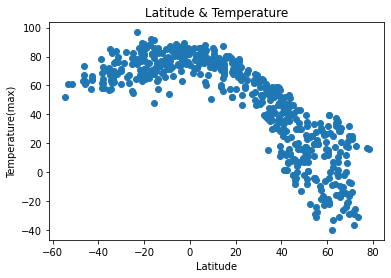

In [50]:
#create a scatter plot 
plt.scatter(weather_data['Latitude'],weather_data['Temperatrue'])

#set axis labels and title
plt.title('Latitude & Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature(max)')

#save as PNG
plt.savefig("Latitude&Temperature.png")

## Latitude vs. Humidity Plot

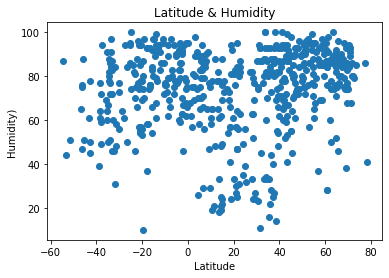

In [51]:
#create a scatter plot 
plt.scatter(weather_data['Latitude'],weather_data['Humidity'])

#set axis labels and title
plt.title('Latitude & Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity)')

#save as PNG
plt.savefig("Latitude&Humidity.png")

## Latitude vs. Cloudiness Plot

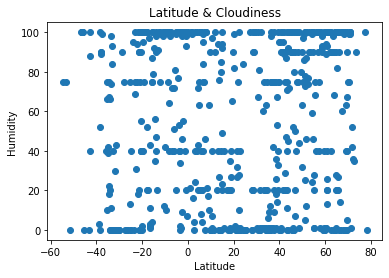

In [53]:
#create a scatter plot 
plt.scatter(weather_data['Latitude'],weather_data['Cloudiness'])

#set axis labels and title
plt.title('Latitude & Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#save as PNG
plt.savefig("Latitude&Cloudiness.png")

## Latitude vs. Wind Speed Plot

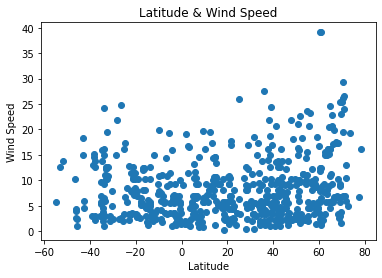

In [54]:
#create a scatter plot 
plt.scatter(weather_data['Latitude'],weather_data['Wind Speed'])

#set axis labels and title
plt.title('Latitude & Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

#save as PNG
plt.savefig("Latitude&WindSpeed.png")

## Linear Regression

In [55]:
#split data between northern and southern hemisphere (based on lat & long being 0)
northern_hem = weather_data.loc[weather_data["Latitude"] >= 0]
southern_hem = weather_data.loc[weather_data["Longitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression